#### Q1. A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?

Ans:
S be the event that an employee is a smoker,

H be the event that an employee uses the company's health insurance plan.

P(H) = 0.7 

P(S|H) = 0.4

P(S|H) = P(H|S) * P(S) / P(H)

= 0.4 * 0.7 / P(S)

But P(S) = ?

Thus, P(S) = P(S|H) * P(H) + P(S|not H) * P(not H)

We are not given P(S|not H), but we can assume that P(S|not H) = 0.1

= 0.4 * 0.7 + 0.1 * 0.3 = 0.31


Finally, 

P(H|S) = 0.4 * 0.7 / 0.31 = 0.9
       
Therefore, the probability that an employee is a smoker given that he/she uses the health insurance plan is 0.9.

#### Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

Ans: 
- The main difference between Bernoulli Naive Bayes and Multinomial Naive Bayes is the type of input they can handle. 

- Bernoulli Naive Bayes is used for binary input data, where each feature can take only two values (e.g., 0 or 1). 

- On the other hand, Multinomial Naive Bayes is used for discrete input data, where each feature can take multiple values (e.g., word counts in a document).

#### Q3. How does Bernoulli Naive Bayes handle missing values?

Ans: Bernoulli Naive Bayes assumes that the missing values are equal to the complement of the observed values for the feature. 

For example, if the observed value for a feature is 1, then the missing value is assumed to be 0. 

Similarly, if the observed value is 0, then the missing value is assumed to be 1. This assumption can be problematic if the missing values are not Missing Completely at Random (MCAR).

#### Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Ans: 
- Gaussian Naive Bayes can be used for multi-class classification by using the principle of maximum a posteriori (MAP) estimation. 

- In this approach, a separate Gaussian distribution is fit to each class, with the mean and variance estimated from the training data for each class. 

- During prediction, the class with the highest posterior probability is chosen as the predicted class.

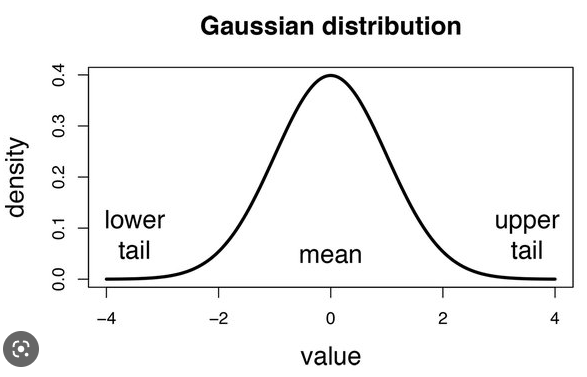

#### Q5. Assignment:

#### **Data preparation:**
##### Download the "Spambase Data Set" from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/ datasets/Spambase). This dataset contains email messages, where the goal is to predict whether a message is spam or not based on several input features.

#### **Implementation:**
##### Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the dataset. You should use the default hyperparameters for each classifier.

#### **Results:**
##### Report the following performance metrics for each classifier:
Accuracy

Precision

Recall

F1 score

#### **Discussion:**
##### Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is the case? Are there any limitations of Naive Bayes that you observed?

#### **Conclusion:**
##### Summarise your findings and provide some suggestions for future work.

#### **Note:** This dataset contains a binary classification problem with multiple features. The dataset is relatively small, but it can be used to demonstrate the performance of the different variants of Naive Bayes on a real-world problem.

In [27]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import cross_validate

In [28]:
df = pd.read_csv('spambase.data', delimiter=',', header=None)

In [29]:
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
                'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
                'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
                'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
                'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
                'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
                'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
                'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
                'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
                'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
                'capital_run_length_total', 'is_spam']

df.columns = column_names
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [31]:
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()
gaussian_nb = GaussianNB()

In [33]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

for clf in [bernoulli_nb, multinomial_nb, gaussian_nb]:
    scores = cross_validate(clf, X, y, cv=10, scoring=scoring)
    print(f"{clf.__class__.__name__}:")
    print(f"  Accuracy: {scores['test_accuracy'].mean():.3f}")
    print(f"  Precision: {scores['test_precision'].mean():.3f}")
    print(f"  Recall: {scores['test_recall'].mean():.3f}")
    print(f"  F1 score: {scores['test_f1'].mean():.3f}", '\n')

BernoulliNB:
  Accuracy: 0.884
  Precision: 0.887
  Recall: 0.815
  F1 score: 0.848 

MultinomialNB:
  Accuracy: 0.786
  Precision: 0.739
  Recall: 0.721
  F1 score: 0.728 

GaussianNB:
  Accuracy: 0.822
  Precision: 0.710
  Recall: 0.957
  F1 score: 0.813 

